In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Make a checkpoints directory
import os
output_dir = "/content/drive/MyDrive/Colab Notebooks/checkpoint_DATA_MINING"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign_dataset 1.csv')

In [ ]:
df.head()


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
campaign_id,0
company,0
campaign_type,0
target_audience,0
duration,0
channel_used,0
conversion_rate,0
acquisition_cost,0
roi,0
location,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df['duration_days'] = df['duration'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-249956468.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_days'] = df['duration'].str.extract('(\d+)').astype(int)


In [ ]:
df[['duration', 'duration_days']].head()


,duration,duration_days
0,30 days,30
1,60 days,60
2,30 days,30
3,60 days,60
4,15 days,15


In [ ]:
df['acquisition_cost'] = (
    df['acquisition_cost']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [ ]:
df['acquisition_cost'].describe()


,acquisition_cost
count,200000.000000
mean,12504.393040
std,4337.664545
min,5000.000000
25%,8739.750000
50%,12496.500000
75%,16264.000000
max,20000.000000


In [ ]:
numeric_cols = [
    'conversion_rate',
    'acquisition_cost',
    'roi',
    'clicks',
    'impressions',
    'engagement_score',
    'duration_days'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)


In [ ]:
for col in numeric_cols:
    print(col, 'min:', df[col].min(), 'max:', df[col].max())


conversion_rate min: 0.01 max: 0.15
acquisition_cost min: 5000.0 max: 20000.0
roi min: 2.0 max: 8.0
clicks min: 100 max: 1000
impressions min: 1000 max: 10000
engagement_score min: 1 max: 10
duration_days min: 15 max: 60


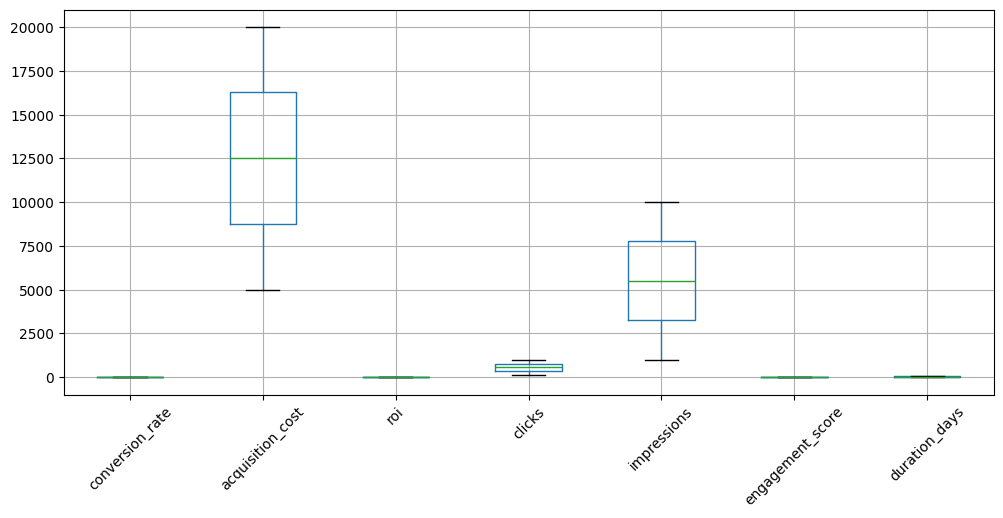

In [ ]:
plt.figure(figsize=(12,5))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['engagement_per_impression'] = df['engagement_score'] / df['impressions']


In [ ]:
df['cost_per_click'] = df['acquisition_cost'] / df['clicks']


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()


In [ ]:
df = df.drop(columns=['duration', 'date'])


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   campaign_id                200000 non-null  int64  
 1   company                    200000 non-null  object 
 2   campaign_type              200000 non-null  object 
 3   target_audience            200000 non-null  object 
 4   channel_used               200000 non-null  object 
 5   conversion_rate            200000 non-null  float64
 6   acquisition_cost           200000 non-null  float64
 7   roi                        200000 non-null  float64
 8   location                   200000 non-null  object 
 9   language                   200000 non-null  object 
 10  clicks                     200000 non-null  int64  
 11  impressions                200000 non-null  int64  
 12  engagement_score           200000 non-null  int64  
 13  customer_segment           20

,campaign_id,company,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,duration_days,engagement_per_impression,cost_per_click
0,1,innovate industries,email,men 18-24,google ads,0.04,16174.0,6.29,chicago,spanish,506,1922,6,health & wellness,30,0.003122,31.964427
1,2,nexgen systems,email,women 35-44,google ads,0.12,11566.0,5.61,new york,german,116,7523,7,fashionistas,60,0.000930,99.706897
2,3,alpha innovations,influencer,men 25-34,youtube,0.07,10200.0,7.18,los angeles,french,584,7698,1,outdoor adventurers,30,0.000130,17.465753
3,4,datatech solutions,display,all ages,youtube,0.11,12724.0,5.55,miami,mandarin,217,1820,7,health & wellness,60,0.003846,58.635945
4,5,nexgen systems,email,men 25-34,youtube,0.05,16452.0,6.50,los angeles,mandarin,379,4201,3,health & wellness,15,0.000714,43.408971


In [ ]:
df_model = df.drop(columns=['campaign_id', 'company', 'location', 'language','customer_segment'])
df_model.head()


,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,roi,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click
0,email,men 18-24,google ads,0.04,16174.0,6.29,506,1922,6,30,0.003122,31.964427
1,email,women 35-44,google ads,0.12,11566.0,5.61,116,7523,7,60,0.000930,99.706897
2,influencer,men 25-34,youtube,0.07,10200.0,7.18,584,7698,1,30,0.000130,17.465753
3,display,all ages,youtube,0.11,12724.0,5.55,217,1820,7,60,0.003846,58.635945
4,email,men 25-34,youtube,0.05,16452.0,6.50,379,4201,3,15,0.000714,43.408971


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_model.copy()

categorical_cols = ['campaign_type', 'target_audience', 'channel_used']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [ ]:
df_encoded[categorical_cols].head()


,campaign_type,target_audience,channel_used
0,1,1,2
1,1,4,2
2,2,2,5
3,0,0,5
4,1,2,5


In [ ]:
label_encoders['channel_used'].classes_


array(['email', 'facebook', 'google ads', 'instagram', 'website',
       'youtube'], dtype=object)

In [ ]:
label_encoders['target_audience'].classes_


array(['all ages', 'men 18-24', 'men 25-34', 'women 25-34', 'women 35-44'],
      dtype=object)

In [ ]:
updated_model=df_encoded.copy()
updated_model.head()

,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,roi,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click
0,1,1,2,0.04,16174.0,6.29,506,1922,6,30,0.003122,31.964427
1,1,4,2,0.12,11566.0,5.61,116,7523,7,60,0.000930,99.706897
2,2,2,5,0.07,10200.0,7.18,584,7698,1,30,0.000130,17.465753
3,0,0,5,0.11,12724.0,5.55,217,1820,7,60,0.003846,58.635945
4,1,2,5,0.05,16452.0,6.50,379,4201,3,15,0.000714,43.408971


In [ ]:

# Substep 3.1: define target variable y

y = updated_model['roi']


In [ ]:

# Substep 3.2: define feature matrix X

X = updated_model.drop(columns=['roi'])


In [ ]:

# Substep 3.3: train–test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)


In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = updated_model.drop(columns=['roi'])
y = np.log(updated_model['roi'])  # MUST log

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    num_leaves=31,
    min_data_in_leaf=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = np.exp(model.predict(X_test))
y_true = np.exp(y_test)

print("R2:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 11
[LightGBM] [Info] Start training from score 1.541422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:

# Substep 4.1: train Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [ ]:

# Substep 5.1: evaluate model performance (R², MAE, RMSE)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Train R² :", r2_score(y_train, y_train_pred))
print("Test  R² :", r2_score(y_test, y_test_pred))

print("MAE  :", mean_absolute_error(y_test, y_test_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R² : 0.7097649199257874
Test  R² : -0.014207386021007684
MAE  : 0.3275555863937848
RMSE : 0.38525333619872043


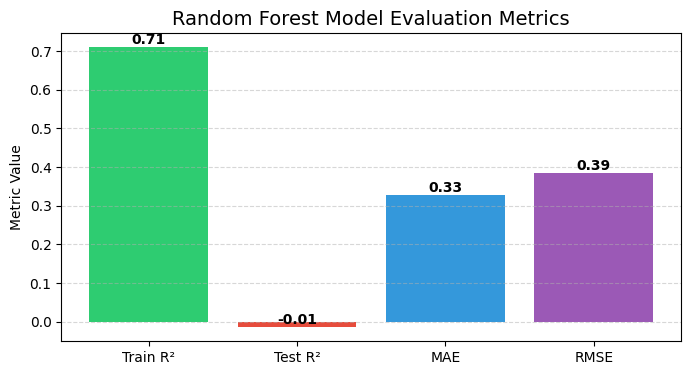

In [ ]:

# Evaluation plot: colorful, clear, with values

import matplotlib.pyplot as plt

metrics = {
    "Train R²": 0.7097649199257874,
    "Test R²": -0.014207386021007684,
    "MAE": 0.3275555863937848,
    "RMSE":0.38525333619872043
}

plt.figure(figsize=(8, 4))
bars = plt.bar(metrics.keys(), metrics.values(),
        color=["#2ecc71", "#e74c3c", "#3498db", "#9b59b6"])

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Random Forest Model Evaluation Metrics", fontsize=14)
plt.ylabel("Metric Value")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

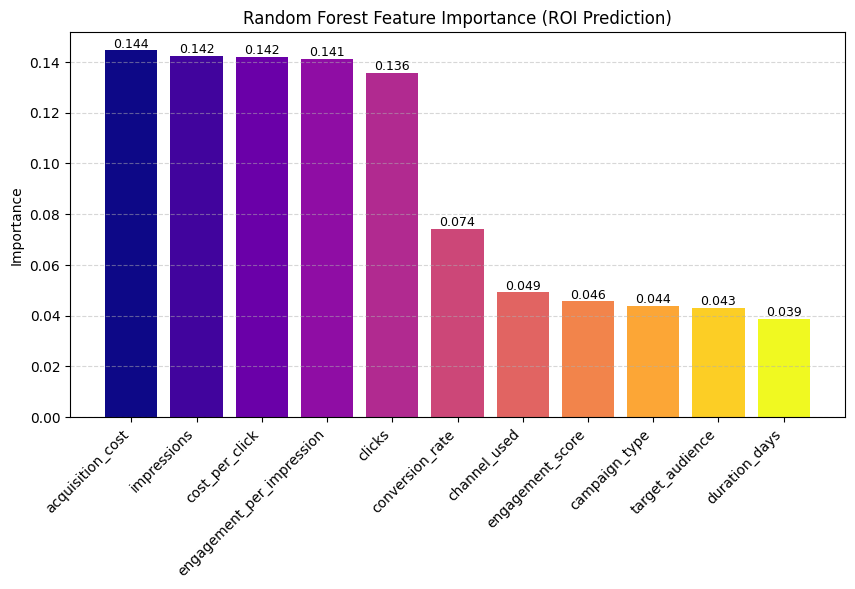

In [ ]:

# Substep 6.1: feature importance plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(
    importances.index,
    importances.values,
    color=plt.cm.plasma(np.linspace(0, 1, len(importances)))
)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.3f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Random Forest Feature Importance (ROI Prediction)")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt


In [ ]:

# Substep 7.1: create a single scenario input (what-if case)

scenario = {
    "conversion_rate": 0.08,
    "acquisition_cost": 14000,
    "clicks": 600,
    "impressions": 6000,
    "engagement_score": 7,
    "duration_days": 15,
    "engagement_per_impression": 7 / 6000,
    "cost_per_click": 14000 / 600,
    "campaign_type": label_encoders["campaign_type"].transform(["email"])[0],
    "target_audience": label_encoders["target_audience"].transform(["men 18-24"])[0],
    "channel_used": label_encoders["channel_used"].transform(["facebook"])[0]
}

scenario_df = pd.DataFrame([scenario])

scenario_df = scenario_df[X.columns]


In [ ]:
scenario_df

,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click
0,1,1,1,0.08,14000,600,6000,7,15,0.001167,23.333333


In [ ]:

# Substep 7.2: predict ROI for scenario

predicted_roi = rf_model.predict(scenario_df)

print("Predicted ROI for the given scenario:", round(predicted_roi[0], 3))


Predicted ROI for the given scenario: 4.96


In [ ]:

# Substep 7.3: create three controlled scenario inputs

scenarios = [
    {
        "conversion_rate": 0.07,
        "acquisition_cost": 10000,
        "clicks": 450,
        "impressions": 5000,
        "engagement_score": 5,
        "duration_days": 15,
        "engagement_per_impression": 5 / 5000,
        "cost_per_click": 10000 / 450,
        "campaign_type": label_encoders["campaign_type"].transform(["email"])[0],
        "target_audience": label_encoders["target_audience"].transform(["men 18-24"])[0],
        "channel_used": label_encoders["channel_used"].transform(["facebook"])[0]
    },
    {
        "conversion_rate": 0.08,
        "acquisition_cost": 14000,
        "clicks": 600,
        "impressions": 6000,
        "engagement_score": 7,
        "duration_days": 15,
        "engagement_per_impression": 7 / 6000,
        "cost_per_click": 14000 / 600,
        "campaign_type": label_encoders["campaign_type"].transform(["email"])[0],
        "target_audience": label_encoders["target_audience"].transform(["men 18-24"])[0],
        "channel_used": label_encoders["channel_used"].transform(["facebook"])[0]
    },
    {
        "conversion_rate": 0.10,
        "acquisition_cost": 15000,
        "clicks": 750,
        "impressions": 8000,
        "engagement_score": 9,
        "duration_days": 30,
        "engagement_per_impression": 9 / 8000,
        "cost_per_click": 15000 / 750,
        "campaign_type": label_encoders["campaign_type"].transform(["email"])[0],
        "target_audience": label_encoders["target_audience"].transform(["men 18-24"])[0],
        "channel_used": label_encoders["channel_used"].transform(["facebook"])[0]
    }
]

scenario_df = pd.DataFrame(scenarios)
scenario_df = scenario_df[X.columns]



In [ ]:

# Substep 7.4: predict ROI for all three scenarios

scenario_df["predicted_roi"] = rf_model.predict(scenario_df)

scenario_df[["predicted_roi"]]


,predicted_roi
0,1.588095
1,1.508845
2,1.518476


In [ ]:
scenario_df

,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click,predicted_roi
0,1,1,1,0.07,10000,450,5000,5,15,0.001000,22.222222,1.588095
1,1,1,1,0.08,14000,600,6000,7,15,0.001167,23.333333,1.508845
2,1,1,1,0.10,15000,750,8000,9,30,0.001125,20.000000,1.518476


In [ ]:
y.min(), y.max(), y.mean()

(0.6931471805599453, 2.0794415416798357, np.float64(1.5418065014097662))

In [ ]:

#SHARJEEL HASSAN KHAN

In [ ]:

# Substep 8.1: define optimization decision grid

import itertools
import numpy as np
import pandas as pd

# decision space
cost_grid = [8000, 10000, 12000, 14000, 15000]
duration_grid = [15, 30, 45, 60]

channel_grid = label_encoders["channel_used"].transform(
    label_encoders["channel_used"].classes_
)

# baseline engagement assumptions (can be constrained later)
clicks_median = X_train["clicks"].median()
impressions_median = X_train["impressions"].median()
engagement_median = X_train["engagement_score"].median()
conversion_median = X_train["conversion_rate"].median()

# generate grid
decision_grid = []

for cost, dur, ch in itertools.product(cost_grid, duration_grid, channel_grid):
    decision_grid.append({
        "conversion_rate": conversion_median,
        "acquisition_cost": cost,
        "clicks": clicks_median,
        "impressions": impressions_median,
        "engagement_score": engagement_median,
        "duration_days": dur,
        "engagement_per_impression": engagement_median / impressions_median,
        "cost_per_click": cost / clicks_median,
        "campaign_type": label_encoders["campaign_type"].transform(["email"])[0],
        "target_audience": label_encoders["target_audience"].transform(["men 18-24"])[0],
        "channel_used": ch
    })

optimization_df = pd.DataFrame(decision_grid)
optimization_df = optimization_df[X.columns]

optimization_df.head()


,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click
0,1,1,0,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949
1,1,1,1,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949
2,1,1,2,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949
3,1,1,3,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949
4,1,1,4,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949


In [ ]:
optimization_df.shape

(120, 11)

In [ ]:

# Substep 8.2: apply optimization constraints

# constraint thresholds
max_budget = 15000
min_engagement = X_train["engagement_score"].median()
min_clicks = X_train["clicks"].median()

# apply constraints
feasible_df = optimization_df[
    (optimization_df["acquisition_cost"] <= max_budget) &
    (optimization_df["engagement_score"] >= min_engagement) &
    (optimization_df["clicks"] >= min_clicks)
].copy()

feasible_df.shape


(120, 11)

In [ ]:

# Substep 8.3: predict ROI for feasible configurations

feasible_input = feasible_df[X.columns].copy()

feasible_df["predicted_roi"] = rf_model.predict(feasible_input)

feasible_df.head()


,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click,predicted_roi
0,1,1,0,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949,1.482204
1,1,1,1,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949,1.503707
2,1,1,2,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949,1.514916
3,1,1,3,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949,1.536040
4,1,1,4,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949,1.570680


In [ ]:

# Substep 8.4: select top-k ROI configurations

top_k = 10

top_configs = feasible_df.sort_values(
    by="predicted_roi",
    ascending=False
).head(top_k)

top_configs


,campaign_type,target_audience,channel_used,conversion_rate,acquisition_cost,clicks,impressions,engagement_score,duration_days,engagement_per_impression,cost_per_click,predicted_roi
46,1,1,4,0.08,10000,549.0,5522.0,5.0,60,0.000905,18.214936,1.600545
44,1,1,2,0.08,10000,549.0,5522.0,5.0,60,0.000905,18.214936,1.587832
45,1,1,3,0.08,10000,549.0,5522.0,5.0,60,0.000905,18.214936,1.587582
116,1,1,2,0.08,15000,549.0,5522.0,5.0,60,0.000905,27.322404,1.583087
22,1,1,4,0.08,8000,549.0,5522.0,5.0,60,0.000905,14.571949,1.582515
20,1,1,2,0.08,8000,549.0,5522.0,5.0,60,0.000905,14.571949,1.579845
21,1,1,3,0.08,8000,549.0,5522.0,5.0,60,0.000905,14.571949,1.579112
5,1,1,5,0.08,8000,549.0,5522.0,5.0,15,0.000905,14.571949,1.577726
117,1,1,3,0.08,15000,549.0,5522.0,5.0,60,0.000905,27.322404,1.571403
11,1,1,5,0.08,8000,549.0,5522.0,5.0,30,0.000905,14.571949,1.571058


In [ ]:

# Step 9.1 FIX: decode categorical labels FIRST

top_configs = top_configs.copy()

top_configs["channel_label"] = label_encoders["channel_used"].inverse_transform(
    top_configs["channel_used"]
)

top_configs["campaign_type_label"] = label_encoders["campaign_type"].inverse_transform(
    top_configs["campaign_type"]
)

top_configs["target_audience_label"] = label_encoders["target_audience"].inverse_transform(
    top_configs["target_audience"]
)


In [ ]:

# Rule 1: Channel-level ROI rule
channel_rules = (
    top_configs
    .groupby("channel_label")["predicted_roi"]
    .mean()
    .sort_values(ascending=False)
)

# Rule 2: Duration-level ROI rule
duration_rules = (
    top_configs
    .groupby("duration_days")["predicted_roi"]
    .mean()
    .sort_values(ascending=False)
)

# Rule 3: Budget-level ROI rule
cost_rules = (
    top_configs
    .groupby("acquisition_cost")["predicted_roi"]
    .mean()
    .sort_values(ascending=False)
)

channel_rules, duration_rules, cost_rules


(channel_label
 website       1.591530
 google ads    1.583588
 instagram     1.579366
 youtube       1.574392
 Name: predicted_roi, dtype: float64,
 duration_days
 60    1.583990
 15    1.577726
 30    1.571058
 Name: predicted_roi, dtype: float64,
 acquisition_cost
 10000    1.591986
 8000     1.578051
 15000    1.577245
 Name: predicted_roi, dtype: float64)

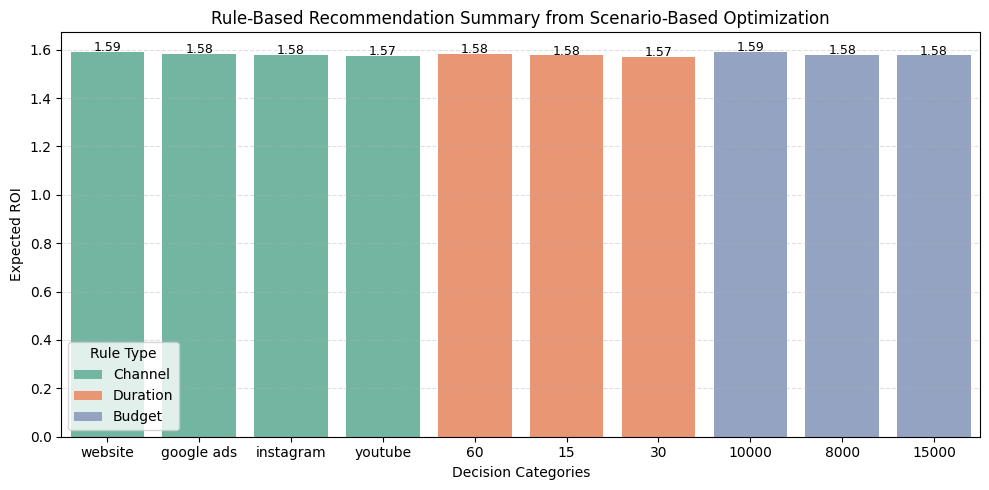

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Prepare data for plotting
plot_df = pd.DataFrame({
    "Category": (
        ["Channel"] * len(channel_rules) +
        ["Duration"] * len(duration_rules) +
        ["Budget"] * len(cost_rules)
    ),
    "Label": (
        channel_rules.index.tolist() +
        duration_rules.index.astype(str).tolist() +
        cost_rules.index.astype(str).tolist()
    ),
    "Expected_ROI": (
        channel_rules.values.tolist() +
        duration_rules.values.tolist() +
        cost_rules.values.tolist()
    )
})

# Create the figure
plt.figure(figsize=(10, 5))
sns.barplot(
    data=plot_df,
    x="Label",
    y="Expected_ROI",
    hue="Category",
    palette="Set2"
)

# Add value labels
for i, v in enumerate(plot_df["Expected_ROI"]):
    plt.text(i, v + 0.002, f"{v:.2f}", ha="center", fontsize=9)

plt.xlabel("Decision Categories")
plt.ylabel("Expected ROI")
plt.title("Rule-Based Recommendation Summary from Scenario-Based Optimization")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Rule Type")
plt.tight_layout()
plt.show()


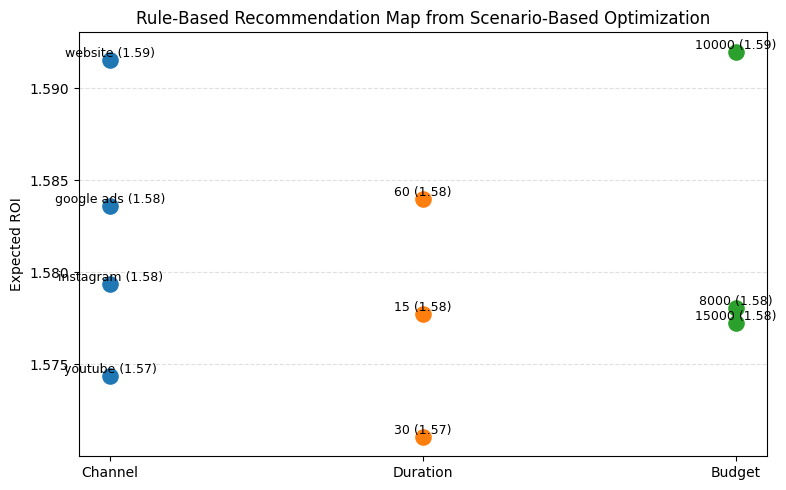

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Build unified dataframe
rule_df = pd.concat([
    channel_rules.rename("Expected_ROI").reset_index()
        .assign(Type="Channel")
        .rename(columns={"channel_label": "Choice"}),

    duration_rules.rename("Expected_ROI").reset_index()
        .assign(Type="Duration")
        .rename(columns={"duration_days": "Choice"}),

    cost_rules.rename("Expected_ROI").reset_index()
        .assign(Type="Budget")
        .rename(columns={"acquisition_cost": "Choice"})
])

# Encode categories for x-axis spacing
type_order = ["Channel", "Duration", "Budget"]
rule_df["x"] = rule_df["Type"].map({t: i for i, t in enumerate(type_order)})

# Plot
plt.figure(figsize=(8,5))

for t in type_order:
    subset = rule_df[rule_df["Type"] == t]
    plt.scatter(
        subset["x"],
        subset["Expected_ROI"],
        s=120,
        label=t
    )
    for _, row in subset.iterrows():
        plt.text(
            row["x"],
            row["Expected_ROI"],
            f"{row['Choice']} ({row['Expected_ROI']:.2f})",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xticks(range(len(type_order)), type_order)
plt.ylabel("Expected ROI")
plt.title("Rule‑Based Recommendation Map from Scenario‑Based Optimization")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
